# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# Importing data
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

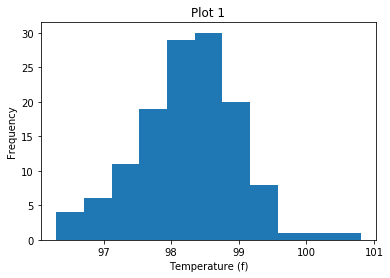

In [2]:
# CL
# Plotting histogram 
import matplotlib.pyplot as plt
import numpy as np

plt.hist(data=df, x='temperature', bins=int(np.sqrt(len(df.index))))
plt.xlabel('Temperature (f)')
plt.ylabel('Frequency')
plt.title('Plot 1')
plt.show()

In [3]:
# CL
# Calculate statistics
from scipy.stats import mstats
nm_test = mstats.normaltest(df.temperature)
print('mean =', np.mean(df.temperature))
print('median =', np.median(df.temperature))
print('standard deviation =', np.std(df.temperature))
print('normal test p-value:', nm_test.pvalue, '(H0 is sample comes from a normal distribution)')

mean = 98.24923076923078
median = 98.3
standard deviation = 0.7303577789050377
normal test p-value: 0.258747986349 (H0 is sample comes from a normal distribution)


In [24]:
# CL
# Conducting one sample z-test
from statsmodels.stats.weightstats import ztest, ttest_ind
result = ztest(x1 = df.temperature,x2 =None, value = 98.6, alternative='two-sided')
print('Result-1')
print('\n')
print('H0: mean = 98.6')
print('H1: mean != 98.6 (two-sided)')
print('Test Statistic:', result[0])
print('P-Value:', result[1])


Result-1


H0: mean = 98.6
H1: mean != 98.6 (two-sided)
Test Statistic: -5.45482329236
P-Value: 4.9021570141e-08


In [25]:
# CL
# Conductiong one sample t-test
from scipy import stats
result = stats.ttest_1samp(df.temperature, 98.6)
print('Result-2')
print('\n')
print('H0: mean = 98.6')
print('H1: mean != 98.6 (two-sided)')
print('Test Statistic:', result.statistic)
print('P-Value:', result.pvalue)

Result-2


H0: mean = 98.6
H1: mean != 98.6 (two-sided)
Test Statistic: -5.45482329236
P-Value: 2.41063204156e-07


In [13]:
# CL
# Performing the same tests with 10 samples

sample = np.random.choice(df.temperature, size=10)

# Z-test
result_z = ztest(x1 = sample,x2 =None, value = 98.6, alternative='two-sided')
print('Result-3')
print('\n')
print('H0: mean = 98.6')
print('H1: mean != 98.6 (two-sided)')
print('Test Statistic:', result_z[0])
print('P-Value:', result_z[1])

# T-test
result_t = stats.ttest_1samp(sample, 98.6)
print('\n')
print('Result-4')
print('\n')
print('H0: mean = 98.6')
print('H1: mean != 98.6 (two-sided)')
print('Test Statistic:', result_t.statistic)
print('P-Value:', result_t.pvalue)

Result-3


H0: mean = 98.6
H1: mean != 98.6 (two-sided)
Test Statistic: -2.193600052
P-Value: 0.028264174684


Result-4


H0: mean = 98.6
H1: mean != 98.6 (two-sided)
Test Statistic: -2.193600052
P-Value: 0.05592109612


In [29]:
# CL
# Calculating confidence interval and margin of error of the population mean

# Estimating standard deviation of population
SD_pop = np.std(df.temperature)
# Standard deviation of sampling distribution
SD_samdist = SD_pop / np.sqrt(len(df.index))
# Assume confidence interval of 95%
margin_err = SD_samdist*2
lower = round(np.mean(df.temperature)-margin_err, 2)
upper = round(np.mean(df.temperature)+margin_err, 2)
print('We are 95% confident that the true mean temperature is between', lower, 'and', upper)


We are 95% confident that the true mean temperature is between 98.12 and 98.38


Result-5


H0- m_mean - f_mean = 0
H1- m_mean != f_mean
p-value:  0.0127
We are rejecting the null hypothesis of there is no difference in mean temperature between male and female


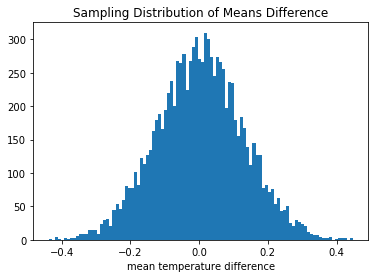

In [28]:
# CL
# Investigating difference between males and females "normal" temperature

m = df.temperature[df.gender == 'M'].values
f = df.temperature[df.gender == 'F'].values

m_mean = np.mean(m)
f_mean = np.mean(f)
diff = f_mean - m_mean
mean = np.mean(np.concatenate((m, f)))


# Performing bootstrap hypothesis testing
# H0- there's no difference in mean temperatures between female and male
# H1- the male and female mean temperatures are statistically different

# Shifting the male and female means while preserving the variances
m_shifted = m + mean - m_mean
f_shifted = f + mean - f_mean

bs_diff = []
for i in range(10000):
    f_sample = np.random.choice(f_shifted, size=len(f))
    m_sample = np.random.choice(m_shifted, size=len(f))
    f_mean = np.mean(f_sample)
    m_mean = np.mean(m_sample)
    bs_diff.append(f_mean - m_mean)
    
p_value = (np.sum(bs_diff >= diff))/len(bs_diff)
print('Result-5')
print('\n')
print('H0- m_mean - f_mean = 0')
print('H1- m_mean != f_mean')
print('p-value: ', p_value)
print('We are rejecting the null hypothesis of there is no difference in mean temperature between male and female')

plt.hist(bs_diff, bins=int(np.sqrt(len(bs_diff))))
plt.title('Sampling Distribution of Means Difference')
plt.xlabel('mean temperature difference')
plt.show()

<div class="alert alert-block alert-success">
<h3>CL</h3>


<h3>1</h3>
<p>Yes, **Plot 1** and normal test from **Result 1** shows that the distribution is approximately normal. However, it is a little left skewed.</p>

<h3>2</h3>
<p>-No, it's not large. Necessary sample size for very large population is usually determined by the following equation: </p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;_sample size = [(Z-score)^2 \* StdDev \* (1-StdDev)] / [(margin of error)^2]_ </p>
<p>Assuming Confidence Level of 90%, Margin of Error of +/- 0.05, and Standard Deviation of 0.73, we need 213 observations to get the assumed accuracy. For the purpose of this study, we most likely would need better accuracy, which means more observations. </p>
<p> -Yes, these are independent observations. </p>

<h3>3</h3>
<p> -Based on the sample and the small p values obtained from the tests, we are rejecting the null hypothesis of population mean being equal to 98.6.</p>
<p> -We're using one sample test because we're comparing the mean of a sample to a known value instead of comparing the means of two samples. </p>
<p> -We're using z-test because sample size is more than 30, so we could assume that the sampling distribution is normal.</p>
<p> -The result from z-test (**Result 1**) shows smaller p-value than result from t-test (**Result 2**). However, the difference is very small. This is because t-distribution gets really similar to z-distribution when sample size is more than 30. </p>

<h3>4</h3>
<p>-T-test is the correct one to use because we're only using 10 observations in this case. </p>
<p>-We noticed that the p-values from both t-test and z-test using only 10 observations (**Result 3 & Result 4**) were less similar than p-values for t-test and z-test using 130 observations (**Result 1 & Result 2**). This is because z-test is only appropriate for cases with sample size bigger than 30.</p>

<h3>5</h3>
<p>Based on the sample obtained, **Result 4** shows that we are 95% confident that the true mean temperature is between 98.12 F and 98.38 F Therefore, I would define the "abnormal" temperature to be anywhere lower than 98.12 F and higher than 98.38 H. </p>

<h3>6</h3>
<p>-Bootstrap hypothesis testing (**Result 5**) shows that there is a statistical significant difference between males and females normal temperatures. </p>
<p>-We generated 1000 bootstrap means, each from 65 bootstrap samples of both male and female body temperatures. This is because we wanted to simulate sampling distribution of the difference in mean. From there, we calculated the one tailed p-value based on the observed mean difference and bootstrap mean differences to test the null hypothesis. </p>

</div>

